<a href="https://colab.research.google.com/github/ZeynepRuveyda/OpenCV_Documentation/blob/main/Basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Create new Images </font>
In the previous section we learnt how to load images from disk. Let us discuss some ways of creating new images or copies of images already there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
DATA_PATH = '/content/drive/My Drive/OpenCV_Documentation/data1/'

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [ ]:
# Read image
image = cv2.imread("/content/drive/My Drive/OpenCV_Documentation/data1/images/boy.jpg")
cv2_imshow(image)

In [ ]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

### <font style="color:rgb(8,133,37)">Create copy of an Image </font>

In [ ]:
# Create a new image by copying the already present image using the copy operation
imageCopy = image.copy()

### <font style="color:rgb(8,133,37)">Create a empty matrix </font>
Let us create an empty matrix with size (100,200).


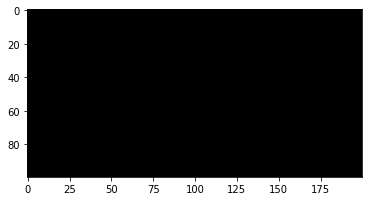

In [ ]:
emptyMatrix = np.zeros((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

Let's fill it with white pixels

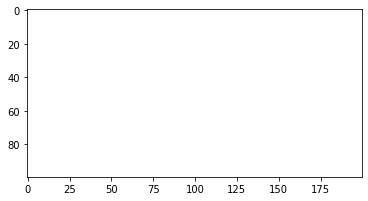

In [ ]:
emptyMatrix = 255*np.ones((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

### <font style="color:rgb(8,133,37)">Create a empty matrix of the same size as original image </font>
Let us create a matrix with the same size and data type as the original image and fill it with 100. We will use numpy function ones_like to create a new matrix filled with ones. We then multiply it by the desired number to get the final marix.

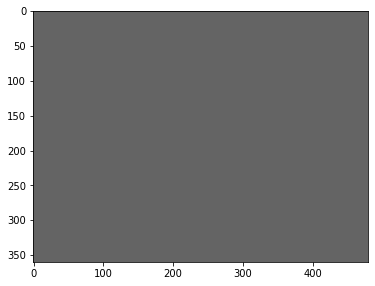

In [ ]:
emptyOriginal = 100*np.ones_like(image)
plt.imshow(emptyOriginal)

#### <font style="color:rgb(200,0,0)">NOTE </font>
In numpy, the first index is for height or row and 2nd one is for width or column. But in OpenCV it is mostly width and height (think of it as opencv talks in terms of (x,y) whereas numpy talks in terms of row and column)

In [ ]:
# Crop out a rectangle
# x coordinates = 170 to 320
# y coordinates = 40 to 200
crop = image[40:200,170:320]

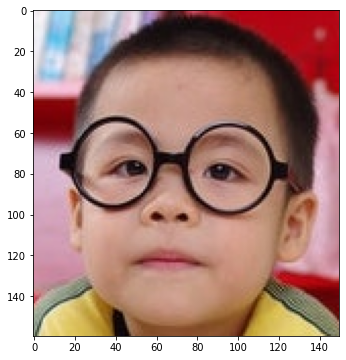

In [ ]:
plt.imshow(crop[:,:,::-1])

Let's copy his face to the left and right.

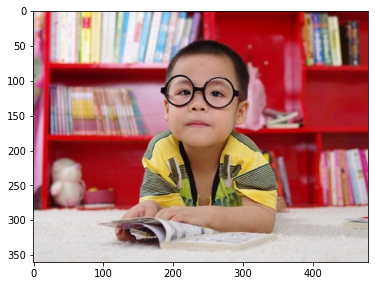

In [ ]:
# Let's see what image we are dealing with
copiedImage = image.copy()
plt.imshow(image[:,:,::-1])

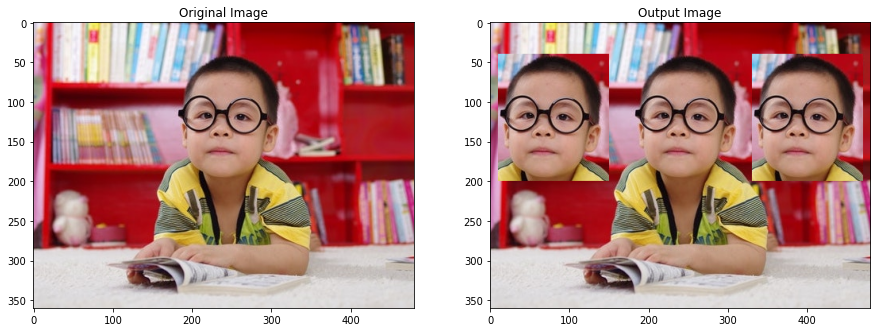

In [ ]:
copyRoi = image[40:200,180:320]

# Find height and width of the ROI
roiHeight,roiWidth = copyRoi.shape[:2]

# Copy to left of Face
copiedImage[40:40+roiHeight, 10:10+roiWidth] = copyRoi
# Copy to right of Face
copiedImage[40:40+roiHeight, 330:330+roiWidth] = copyRoi

# Display the output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(copiedImage[...,::-1]);plt.title("Output Image");

# <font style="color:rgb(50,120,229)">Resizing an Image </font>


We will use [**`cv2.resize`**](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) function for resizing an image.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	)
```
**Parameters**
- **`src`** - input image
- **`dst`** - output resized image
- **`dsize`** - output image size
- **`fx`** - scale factor along the horizontal axis; 
- **`fy`** - scale factor along the vertical axis; 
Either dsize or both fx and fy must be non-zero.
- **`interpolation`** - interpolation method ( Bilinear / Bicubic etc ). 

Check interpolation flags [here](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) 


There are two ways of using the resize function.
1. Specify width and height of output image explicitly
    > Use the dsize argument to specify the output size in the form (width,height).
2. Specify the scaling factors for resizing ( for both width and height )
    > Use fx and fy arguments to specify the scaling factor for horizontal and vertical axis respectively. It should be a float. 
    
    > The output size is calculated as: `Size(round(fx*src.cols), round(fy*src.rows))`

## <font style="color:rgb(50,120,229)">Method1 - Specify width and height</font>
You have to manually keep track of the aspect ratio of the output image as this method will not preserve the aspect ratio between input and output image.

Let us take an example to see how to use the functions in OpenCV for resizing.

Text(0.5, 1.0, 'Scaled Down Image')

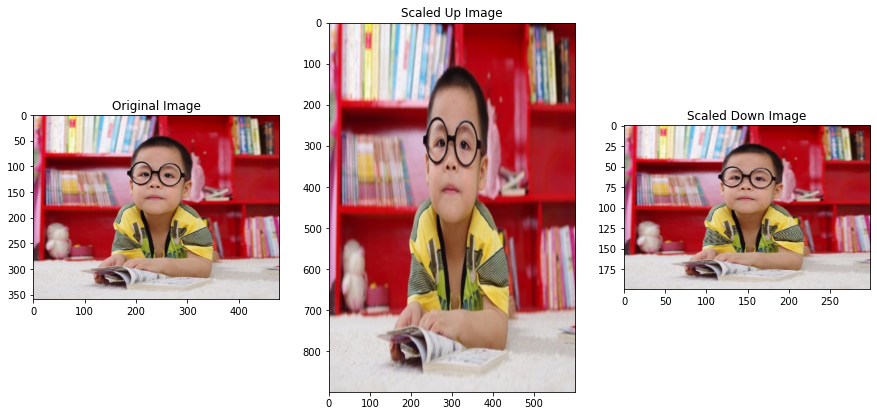

In [ ]:
# Set rows and columns
resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

# Mess up with the aspect ratio
resizeUpWidth = 600
resizeUpHeight = 900
resizedUp = cv2.resize(image, (resizeUpWidth, resizeUpHeight), interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(resizedUp[:,:,::-1]);plt.title("Scaled Up Image")
plt.subplot(133);plt.imshow(resizedDown[:,:,::-1]);plt.title("Scaled Down Image")

You can see that the output images have been scaled( check the axes )

It is also evident that the aspect ratio for the scaledUp output has been totally ruined. In most cases, it is a good idea to use the scaling factor to resize images. 

## <font style="color:rgb(50,120,229)">Method2 - Specify scaling factor</font>
This method is useful when you want to preserve the aspect ratio of the image. For example, say you have an image of size 400x600 and you want the width to be 360. Then, instead of specifying the height, you can find the scaling factor (i.e 360/600 = 0.6) and use it to resize the image.

In [ ]:
# Scaling Down the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

# Scaling Down the image 0.6 times specifying a single scale factor.
scaleDown = 0.6

scaledDown = cv2.resize(image, None, fx= scaleDown, fy= scaleDown, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scaleUpX, fy= scaleUpY, interpolation= cv2.INTER_LINEAR)

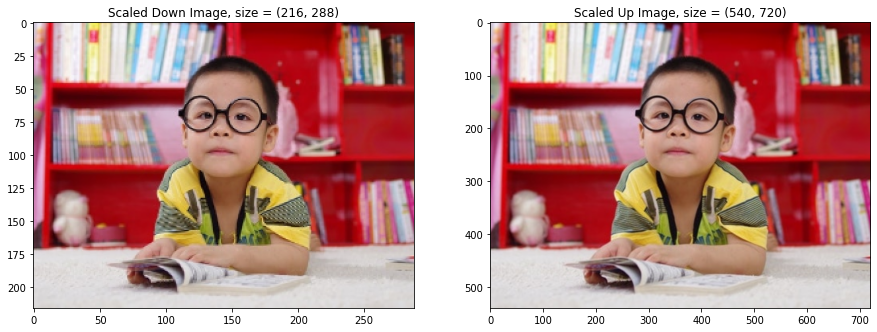

In [ ]:
# We can also use the following syntax for displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaledDown[...,::-1]);plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));
plt.subplot(122);plt.imshow(scaledUp[...,::-1]);plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));

# <font style="color:rgb(50,120,229)">Creating an Image Mask </font>
Masking is a very important step in many image processing and computer vision algorithms. The goal is to segment out the area of interest and apply your algorithm to a specific part of the image. You can perform all operations on this segmented part of the image and put it back on the original image.

## <font style="color:rgb(50,120,229)">Create a mask using coordinates</font>

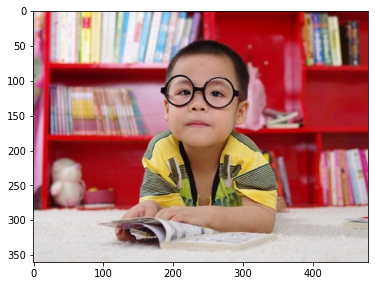

In [ ]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

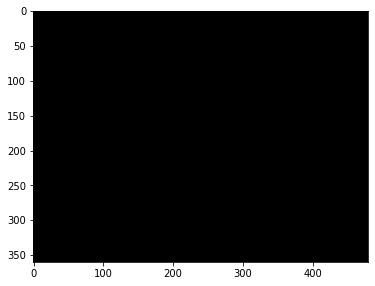

In [ ]:
# Create an empty image of same size as the original
mask1 = np.zeros_like(image)
plt.imshow(mask1)

uint8


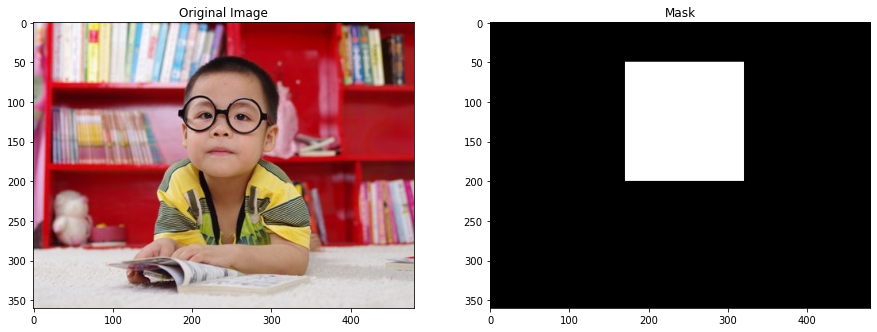

In [ ]:
mask1[50:200,170:320] = 255
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask1[:,:,::-1]);plt.title("Mask")
print(mask1.dtype)

This is the mask for the face region of the input image

## <font style="color:rgb(50,120,229)">Create a mask using pixel intensity or color</font>
Another way of creating masks is by using some logic. One example is using a simple color information. For example, Let us try to find out the pixels which are approximately red in color.

If we want to focus on `red pixels`, the simplest logic that does the trick is:
```
* The red channel should have high intensity ( keep the range of pixel values from 100 to 255 )
* The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)
```
There is a nice OpenCV function which can do exactly this. We will use the opencv function [**`inRange`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

#### <font style="color:rgb(8,133,37)">Function Syntax</font> 
It finds the pixels which lie in between the specified range. It produces a binary output image in which the white pixels corresspond to those pixels in the input image which fall in the specified range. The pixel values which fall outside the specified range are black `(0)`
```Python:
dst	=	cv2.inRange(	src, lowerb, upperb[, dst]	)
```

**Parameters**
- **`src`** - first input array.
- **`lowerb`** - inclusive lower boundary array or a scalar.
- **`upperb`** - inclusive upper boundary array or a scalar.
- **`dst`** - output array of the same size as src and CV_8U type.

It produces a binary image ( pixels are either black or white ).



Text(0.5, 1.0, 'Masked Image')

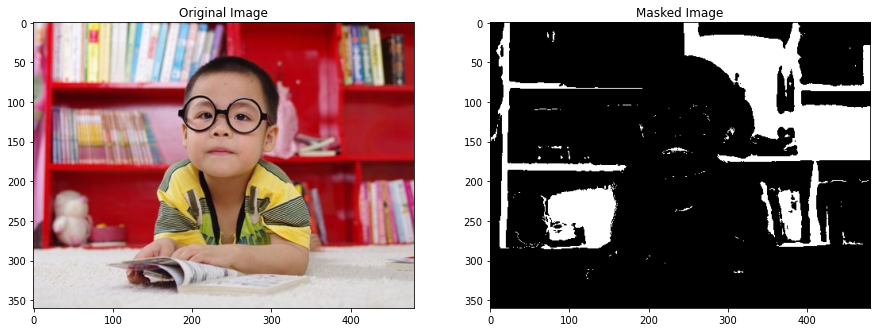

In [ ]:
mask2 = cv2.inRange(image, (0,0,150), (100,100,255))
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask2);plt.title("Masked Image")

As you can see the white portion in the output mask corressponds to the red pixels in the original image. 

We will discuss more about color based masking in later modules.

# <font style="color:rgb(50,120,229)">Datatype Conversion</font>
Before we get into any mathematical operations, it is very important to understand the data types used and how to convert from one to another.

As we saw in previous modules, an image is represented as a numpy array once it's read using **`cv2.imread`** function. The default datatype of this object is **unsigned integer** (**8 bits**). For most Arithmentic operations like multiplication or division, we need to convert the array type to floating point with each pixel having **16, 32 or 64 bits** of data. This helps prevent overflow while working with the images.

Most of the time we dont need to work using float64 and float32 is enough for most image processing operations ( even float16 )

In [ ]:
scalingFactor = 1/255.0

# Convert unsigned int to float
image = np.float32(image)
# Scale the values so that they lie between [0,1]
image = image * scalingFactor

The scale or the scaling factor reduces the range of **0-255** to **0-1**, hence all the floating point numbers now range between 0-1. When we convert back to unsigned integer we use the **reciprocal** of the scaling factor and the range is converted from 0-1 to 0-255.

In [ ]:
#Convert back to unsigned int
image = image * (1.0/scalingFactor)
image = np.uint8(image)

# <font style="color:rgb(50,120,229)">Contrast Enhancement</font>
Many definitions of contrast exist in literature. Without going into the gory details, roughly speaking it is the difference in intensity between the brightest and darkest regions of a given image. Higher the difference, higher is the contrast. The maximum contrast of an image is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.

One of the easiest ways to improve contrast of an image is Intensity Scaling

In this approach, a scale factor ( $\alpha$ ) is multiplied with intensity values of all the pixels. Given below is the code snippet to do the same. Intensity scaling is represented by the following equation 

 $$
 I_o = \alpha I
 $$

## <font style="color:rgb(50,120,229)">Code for Contrast Enhancement</font>

In the code below, we will apply the above mentioned formulas to get contrast enhanced images.

We will increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


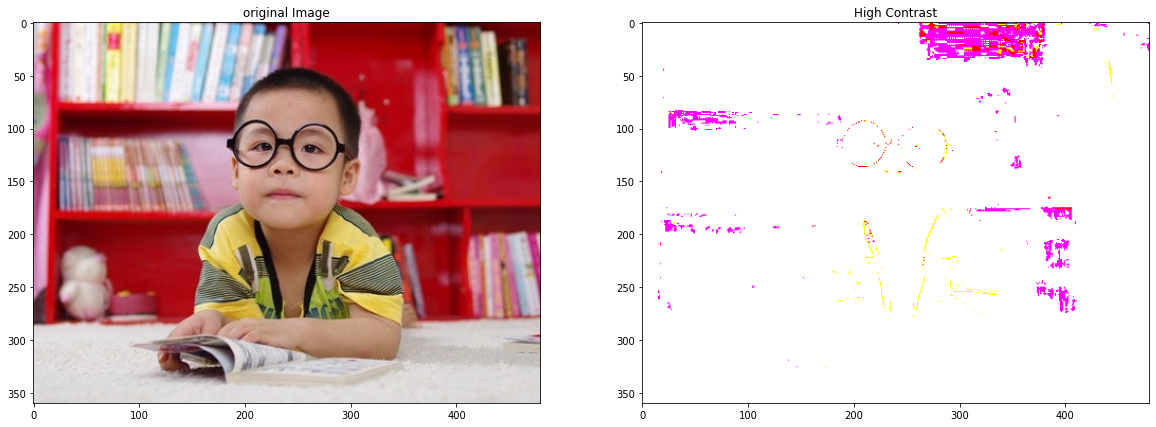

In [ ]:
contrastPercentage = 30.0

# Multiply with scaling factor to increase contrast
contrastHigh = image * (1+contrastPercentage/100)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrastHigh[...,::-1]);plt.title("High Contrast");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [ ]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrastHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 331.5


### <font style="color:rgb(8,133,37)">Issue with Contrast Enhancement code </font>
The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats:
1. If the image is in float datatype, then the range should be [0,1]. Anything above 255 is considered as white.
1. If the image is in int datatype, then the range should be [0,255]

### <font style="color:rgb(8,133,37)">Solution </font>
We can see that the datatype of contrastHigh is float and the max value is 331.5. This means that in order to get rid of this display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So, to get rid of the problem, we can do the following:
1. **`Clip`** the intensity values to **`0 ~ 255`** and change the data type to **`uint8`**.
1. If you want to keep the image in float format, then **`Normalize`** the instensity values so that it lies in **`[0,1]`**

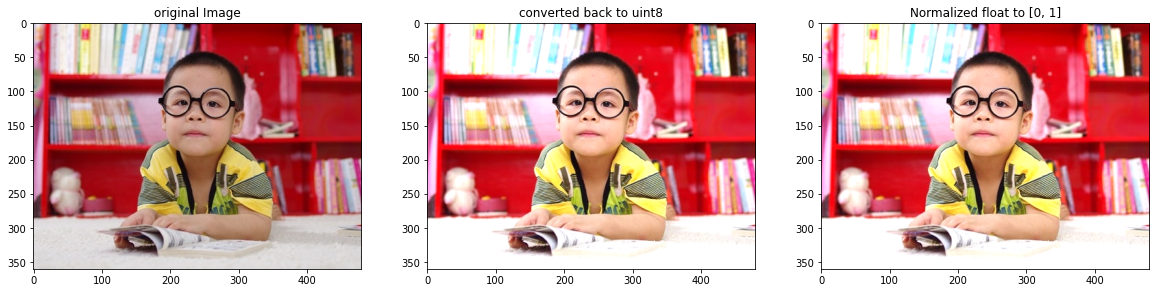

In [ ]:
contrastPercentage = 30

# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = image * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] and keep it in float format
contrastHighNormalized = (image * (1+contrastPercentage/100))/255
contrastHighNormalized01Clipped = np.clip(contrastHighNormalized,0,1)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastHighNormalized01Clipped[...,::-1]);plt.title("Normalized float to [0, 1]");

# <font style="color:rgb(50,120,229)">Brightness Enhancement</font>
Brightness is a measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brighter, the intensity values should be increased by some offset ( $\beta$ ) and vice-versa. 

If $I$ is the input image, and $I_o$ is the output image, brightness enhanced image is given by the equation 

$$
I_o = I + \beta
$$

## <font style="color:rgb(50,120,229)">Code for Brightness Enhancement</font>

In the code below, we will apply the above mentioned formulas to get brightness enhanced images.

We will increase the brightness by 50 intensity levels. ( Note that there are 255 intensity levels in a image)

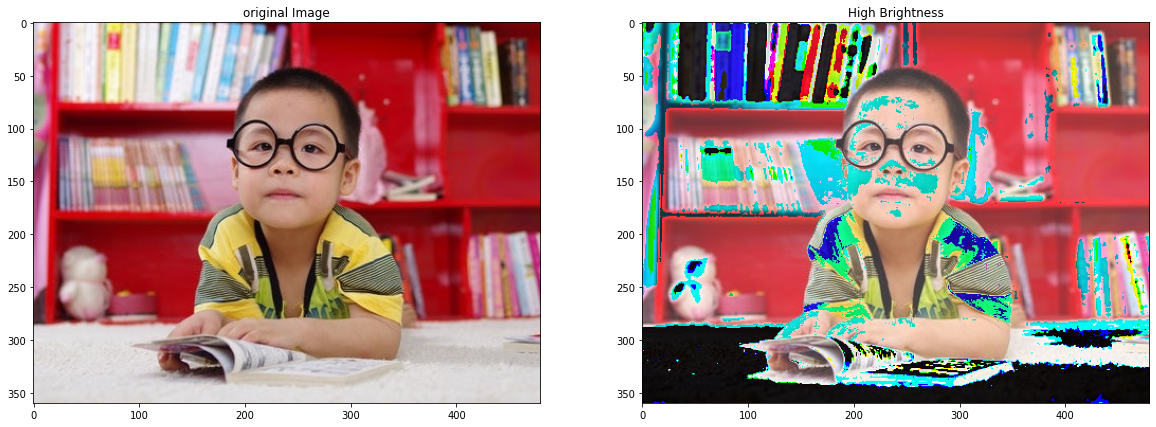

In [ ]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHigh = image + brightnessOffset

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [ ]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(brightHigh.max()))

Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


### <font style="color:rgb(8,133,37)">Issue with Brightness Enhancement Code </font>
The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in `brightHigh` image should have been `305`. But we can see that the highest pixel intensity is in brightHigh image is `255`.

This is happening because of the uint8 datatype. Since the maximum value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an **`overflow`**.

This is a much more serious problem than the display issue we encountered earlier. These kind of bugs go undetected and cause havoc in the final application as they will be difficult to debug also.

Let us take an example to understand what was going on in the above case.

In [ ]:
# Sample 2x2 matrix of type uint8
a = np.array([[100, 110], 
              [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


In [ ]:
# Add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


You can see that the element a[1,1] should have been 260. but instead it overflowed and rolled over. There will be a similar problem if we subtract.

Let us see another interesting nuisance.

In [ ]:
print(a - 130)

[[226 236]
 [246   0]]


And this?

In [ ]:
print(a + (-130))

[[-30 -20]
 [-10   0]]


In the first case, both operands (a and 130) are uint8 and thus the output is uint8 and hence the underflow.

But in the second case, the 2nd operand has a type int16. Thus, the final output becomes int16 and thus, doesnt underflow.

This shows a major Pitfall of using uint8 while dealing with arithmetic operations on images.

Thus, it is important to convert the images to int or float(recommended) data types while doing arithmetic operations (like addition, subraction multiplication etc) on images to avoid undesirable results.

### <font style="color:rgb(8,133,37)">Solution </font>
In order to get rid of this problem, we can do the following:
1. use opencv to handle uint8 arithmetic
1. we should do all mathematical operations at a high dynamic range by converting the datatype of the operands to higher order integers or float, whichever is applicable.

We will see how to get the resolve these issues and get the correct outputs.

### <font style="color:rgb(8,133,37)">Solution 1 : Use opencv functions</font>

In [ ]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


### <font style="color:rgb(8,133,37)">Solution 2a: Convert to int32/int64</font>

You should convert to higher integer types to avoid overflow and underflow situations. 
Perform clipping if necessary and bring it back to uint8 in the final stage as that is what the display functions expect.

In [ ]:
a_int32 = np.int32(a)
b = a_int32+130
print(b)

[[230 240]
 [250 260]]


In [ ]:
print(b.clip(0,255))
b_uint8 = np.uint8(b)
b_uint8

[[230 240]
 [250 255]]


array([[230, 240],
       [250,   4]], dtype=uint8)

You can do the same with float datatype as well

### <font style="color:rgb(8,133,37)">Solution 2b: Convert to normalized float32/float64 </font>



It is a good practice to convert the uint8 to float and normalize the range to [0,1] and change it back to [0,255] after doing all arithmetic operations

In [ ]:
a_float32 = np.float32(a)/255
b = a_float32 + 130/255
print(b)

[[0.90196085 0.94117653]
 [0.9803922  1.0196079 ]]


In [ ]:
c = b*255
print("Output = \n{}".format(c))
print("Clipped output= \n{}".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{}".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]]
Clipped output= 
[[230.00002 240.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 240]
 [250 255]]


# <font style="color:rgb(50,120,229)">Final Solution </font>

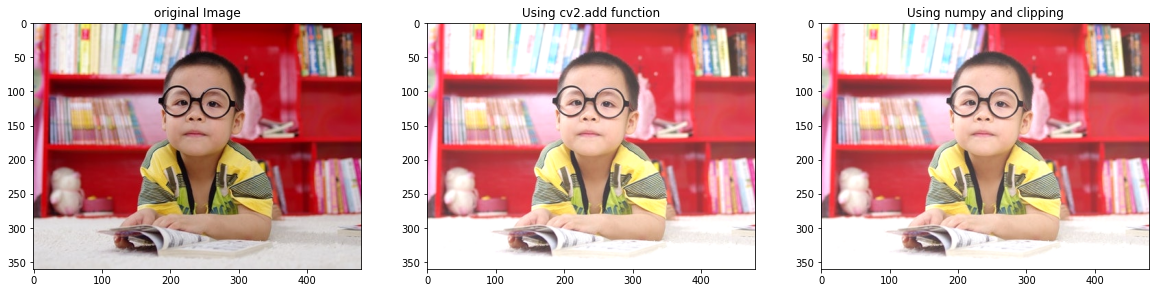

In [ ]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(image, np.ones(image.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(image) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping");

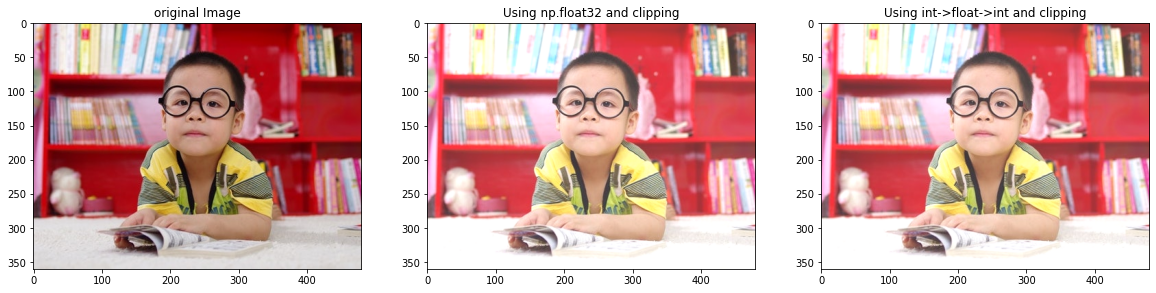

In [ ]:
# Add the offset for increasing brightness
brightHighFloat32 = np.float32(image) + brightnessOffset
brightHighFloat32NormalizedClipped = np.clip(brightHighFloat32/255,0,1)

brightHighFloat32ClippedUint8 = np.uint8(brightHighFloat32NormalizedClipped*255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);plt.title("Using np.float32 and clipping");
plt.subplot(133);plt.imshow(brightHighFloat32ClippedUint8[...,::-1]);plt.title("Using int->float->int and clipping");